In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load points into a dataframe
df = pd.read_csv('./VTC2501D96.XYZ', delim_whitespace=True, names=['x','y','z'])
df.head()

,x,y,z
0,409628.61,127487.96,529.44
1,409728.61,127487.96,529.00
2,409828.61,127487.96,528.38
3,409928.61,127487.95,527.70
4,410028.61,127487.95,528.04


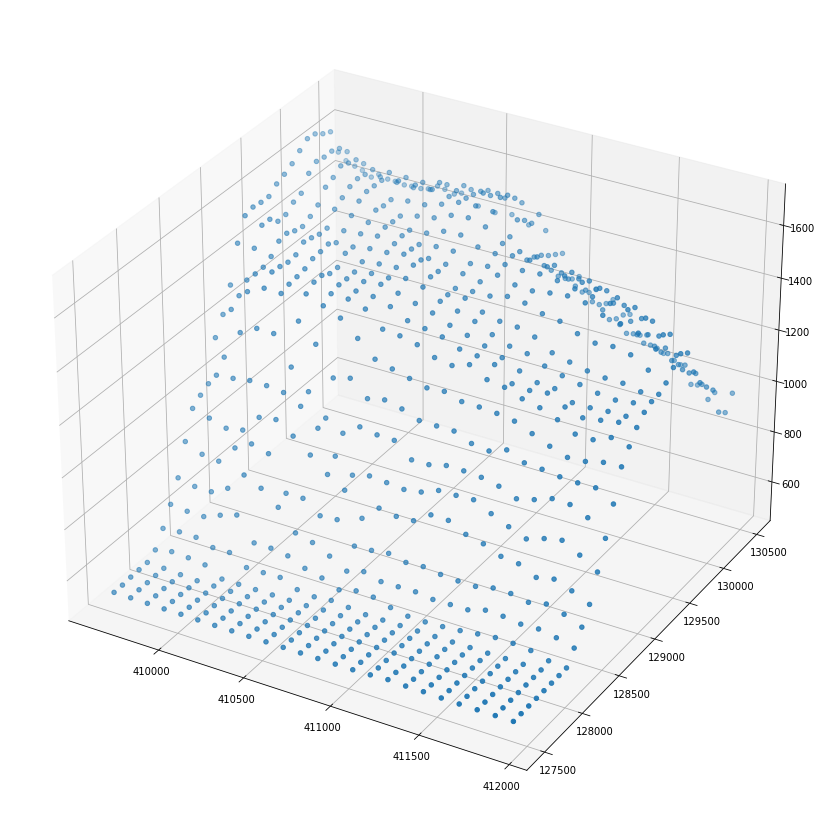

In [3]:
# plot 3d scatter plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(df.x, df.y, df.z)

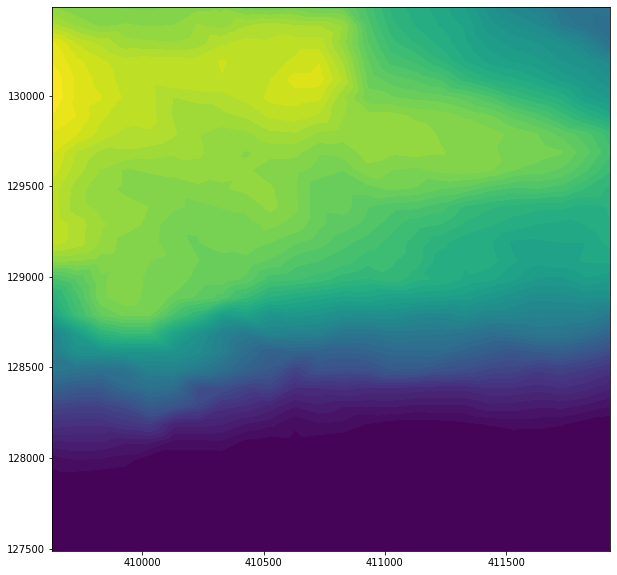

In [4]:
# plot contours from available data
fig = plt.figure(figsize=(10,10))
plt.tricontourf(df.x, df.y, df.z, levels=50)

In [5]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator

# linear interpolation
f = LinearNDInterpolator(list(zip(df.x, df.y)), df.z)

# nearest interpolation
fn = NearestNDInterpolator(list(zip(df.x, df.y)), df.z)

# create mesh
n = 200
X = np.linspace(df.x.min(), df.x.max(), num=n)
Y = np.linspace(df.y.min(), df.y.max(), num=n)
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

# evaluate points
nearest = fn(X, Y)
linear = f(X, Y)

# linear method produces some NaNs on the edges, replace NaN values using the "nearest" interpolation
linear[np.isnan(linear)] = nearest[np.isnan(linear)]

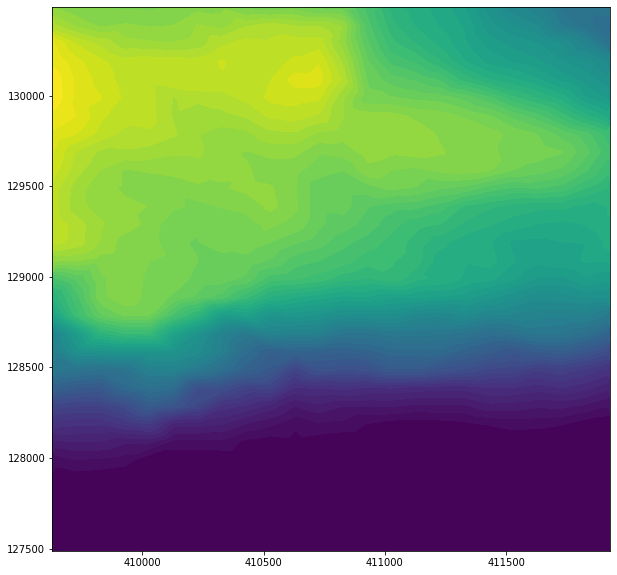

In [6]:
# create new dataframe of points
ndf = pd.DataFrame({"x": X.ravel(), 'y': Y.ravel(), 'z': linear.ravel()})

# plot contours from interpolation data
fig = plt.figure(figsize=(10,10))
plt.tricontourf(ndf.x, ndf.y, ndf.z, levels=50)